In [1]:
import numpy as np
import random
import os
import PIL
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython import display
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 15)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
path = '../input/marvel-character-images/'
labels = ['good', 'evil']
pix_size = 32


In [3]:
def show_random_images(path, labels):
        for i in range(20):
            label_idx = random.randint(0, len(labels)-1) # Select folder at random to choose from
            im_path = path + labels[label_idx] + '/'
            image_idx = random.randint(0, len([name for name in os.listdir(im_path)])-1) # Select image at random from folder
            image_names = [name for name in os.listdir(im_path) ]
            plt.subplot(4,5,i+1).set_title(labels[label_idx])
            plt.imshow(PIL.Image.open(im_path + image_names[image_idx]))

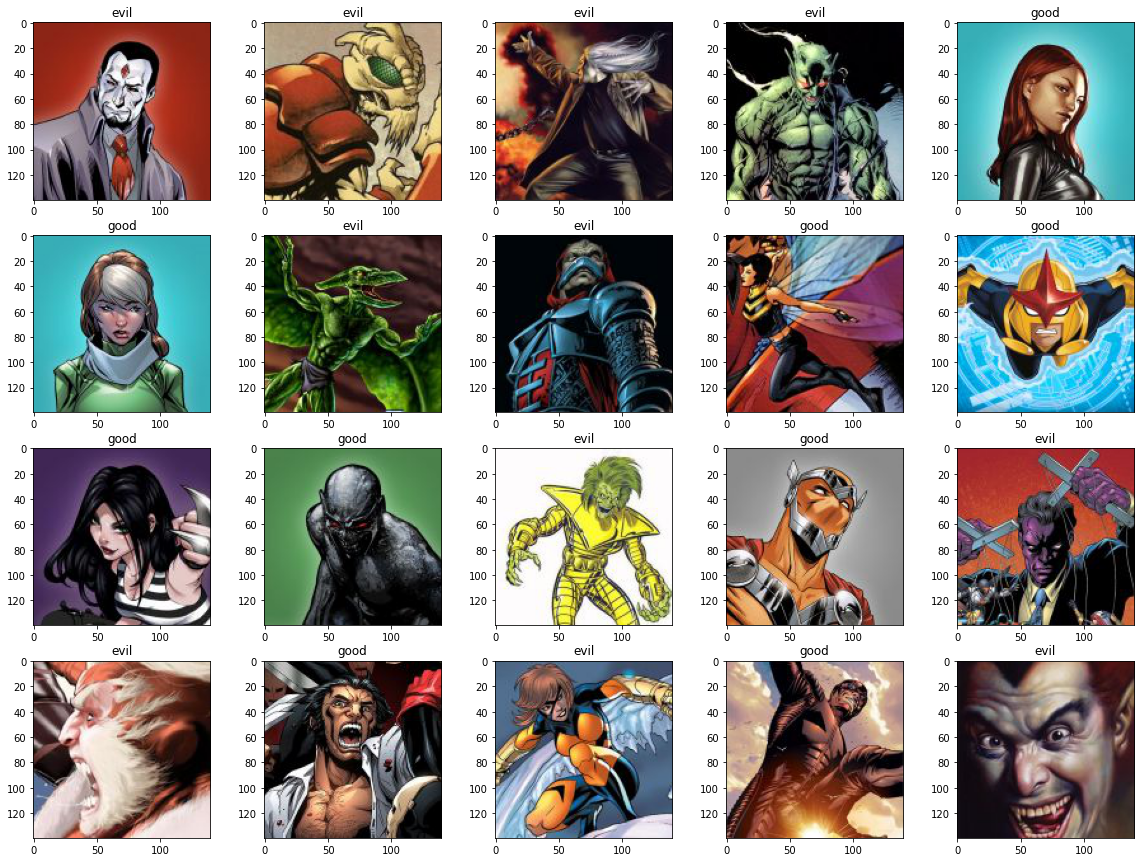

In [4]:
show_random_images(path, labels)

In [5]:
total_heroes = len([name for name in os.listdir(path + labels[0] + '/')])
total_villains = len([name for name in os.listdir(path + labels[1] + '/')])
total_images = total_heroes + total_villains

## Create an array of resized images
images = np.empty((total_images, pix_size, pix_size, 3),dtype=np.int32)
classes = np.empty(total_images,dtype=np.int32)
n = 0
for i in range(len(labels)):
    im_path = path + labels[i] + '/'
    for name in os.listdir(im_path):
        classes[n] = i
        images[n,:,:,:] = np.array(PIL.Image.open(im_path + name).resize((pix_size,pix_size),PIL.Image.BICUBIC))
        n += 1

In [6]:
knn = KNeighborsClassifier()

In [7]:
X = images.reshape(images.shape[0],pix_size*pix_size*3)
y = classes.reshape(classes.shape[0],)

In [8]:
print(X.shape)
print(y.shape)

(597, 3072)
(597,)


In [9]:
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=seed)


# Quick sanity check to make sure we have the desired array shapes
print("X training shape:", X_train.shape)
print("y training shape:", y_train.shape)
print("X testing shape:", X_test.shape)
print("y testing shape:", y_test.shape)

X training shape: (477, 3072)
y training shape: (477,)
X testing shape: (120, 3072)
y testing shape: (120,)


In [10]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [11]:
predictions = knn.predict(X_test)

In [12]:
print('KNN Accuracy: %.3f' % accuracy_score(y_test,predictions))

KNN Accuracy: 0.658


In [13]:
incorrects = predictions != y_test

In [14]:
incorrect_idx = np.where(incorrects == True)[0]

In [15]:
r = random.choice(incorrect_idx)

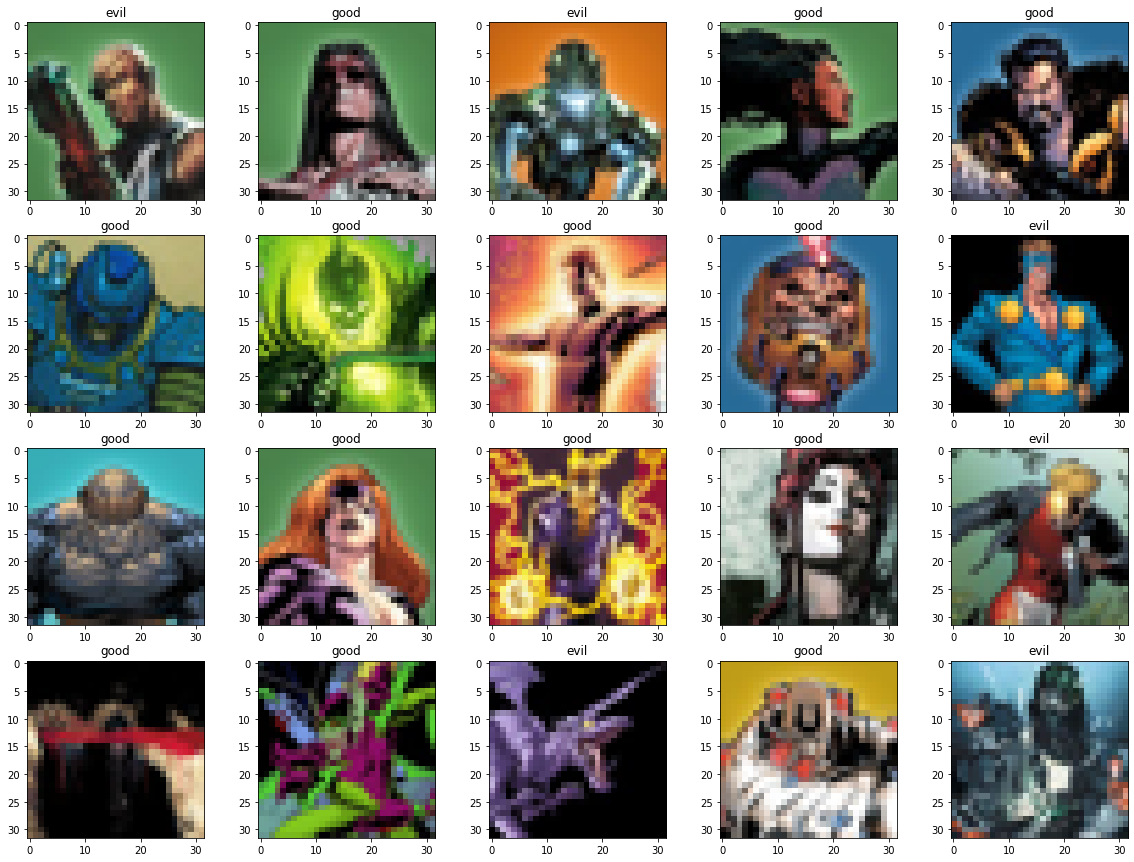

In [16]:
rand = []
i = 0
while i < 20:
        r = random.choice(incorrect_idx)
        if r not in rand:
            rand.append(r)
            plt.subplot(4,5,i+1).set_title('{}'.format(labels[predictions[r]]))
            plt.imshow(X_test.reshape(X_test.shape[0],pix_size,pix_size,3)[r,:,:,:])
            rand.append(r)
            i += 1